# 네이버 VIEW - 웹 크롤링 후 텍스트 형식으로 저장

## Step 1. 필요한 모듈과 함수를 임포트하고 검색어 입력받기

In [1]:
from bs4 import BeautifulSoup

In [2]:
from selenium import webdriver

In [3]:
import time

In [4]:
import sys

In [5]:
query_txt = input('크롤링할 키워드는 무엇입니까? : ')

크롤링할 키워드는 무엇입니까? : 데이터과학


In [6]:
query_txt

'데이터과학'

## Step 2. 크롤링 결과 데이터를 저장할 디렉토리와 파일명 지정하기

In [7]:
f_name = input('검색 결과를 저장할 파일경로와 파일명을 지정하세요(예시: C:/temp/summer/네이버_VIEW_데이터과학.txt)') 

검색 결과를 저장할 파일경로와 파일명을 지정하세요(예시: C:/temp/summer/네이버_VIEW_데이터과학.txt)C:/temp/summer/네이버_VIEW_데이터과학.txt


In [8]:
f_name

'C:/temp/summer/네이버_VIEW_데이터과학.txt'

## Step 3. 크롬 드라이버를 사용해서 웹 브라우저 실행하기

In [9]:
path = 'C:/Temp/chromedriver_115/chromedriver.exe'

In [10]:
path

'C:/Temp/chromedriver_115/chromedriver.exe'

In [11]:
driver = webdriver.Chrome(path)

## Step 4.  네이버 홈페이지 들어가기

In [12]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="06dae825cd4c3368ede32e2bd44d518b")>

In [13]:
driver.get('https://www.naver.com')
time.sleep(2)

## Step 5. 입력 창 클릭하여 검색어 전달하기

F12 키를 이용하여 입력창에 해당하는 HTML 소스 코드 부분을 찾는다.     
id를 활용할 경우, id name은 query 임을 찾음  

In [14]:
element = driver.find_element_by_id('query') 

In [15]:
element

<selenium.webdriver.remote.webelement.WebElement (session="06dae825cd4c3368ede32e2bd44d518b", element="58F9588804BB98A159E7F7CE834B088B_element_6")>

In [16]:
element.send_keys(query_txt)

## Step 6. 검색 버튼 눌러서 실행하기

F12 키를 이용하여 검색 버튼에 해당하는 HTML 소스 코드 부분을 찾는다.  

id을 활요알 경우, id name은 search_btn 임을 찾음  

In [17]:
driver.find_element_by_id('search-btn').click()
time.sleep(2)

## Step 7. BeautifulSoup 활용하여 파싱하기

네이버 VIEW 해당하는 소스 코드 찾기  

VIEW 에 해당하는 xpath는 //*[@id="lnb"]/div[1]/div/ul/li[2]/a 찾음  

In [19]:
driver.find_element_by_xpath('//*[@id="lnb"]/div[1]/div/ul/li[2]/a').click()

In [20]:
full_html = driver.page_source

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/115.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="데이터과학 : 네이버 VIEW검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'데이터과학\'의 네이버 VIEW검색 결과입니다."> <meta name="description" lang="ko" content="\'데이터과학\'의 네이버 VIEW검색 결과입니다."> <title>데이터과학 : 네이버 VIEW검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link re
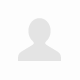
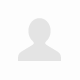
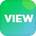

In [21]:
full_html

In [22]:
type(full_html)

str

In [23]:
soup = BeautifulSoup(full_html, 'html.parser') 

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/115.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="데이터과학 : 네이버 VIEW검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'데이터과학'의 네이버 VIEW검색 결과입니다." property="og:description"/> <meta content="'데이터과학'의 네이버 VIEW검색 결과입니다." lang="ko" name="description"/> <title>데이터과학 : 네이버 VIEW검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link
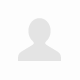
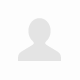
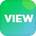

In [24]:
soup

In [25]:
type(soup)

bs4.BeautifulSoup

In [26]:
# class name으로 태그 찾기
# ul 태그에 해당하는 class name은  lst_total _list_base  찾음

content_list = soup.find('ul', class_ = 'lst_total _list_base').find_all('li') 

In [27]:
content_list

[<li class="bx _svp_item" data-cr-area="rvw*b" data-cr-gdid="90000003_0000000000000033F0C6E2BD" data-cr-rank="1"> <div class="total_wrap api_ani_send"> <div class="total_area"> <div class="total_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="https://blog.naver.com/wwjd7777/223082898109" href="#" onclick="tCR('a=rvw*b.kep&amp;r=1&amp;i=90000003_0000000000000033F0C6E2BD&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=rvw*b.kepoff&amp;r=1&amp;i=90000003_0000000000000033F0C6E2BD&amp;u=javascript" data-cr-on="a=rvw*b.kepon&amp;r=1&amp;i=90000003_0000000000000033F0C6E2BD&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this,'a=rvw*b.kephome&amp;r=1&amp;i=90000003_0000000000000033F0C6E2BD

In [28]:
type(content_list)

bs4.element.ResultSet

In [29]:
count = 1
for i in content_list:
    #print(i)
    print('●', count, i.text.strip())
    print('-'*50)
    count += 1

● 1 문서 저장하기  Keep에 저장 Keep 바로가기        2023.04.23.  즐거운 일상  컴퓨터/코딩 없이 배우는 데이터 과학 황보현우 한노아 지음(2023)    저자들의 이력을 보면 빅데이터, 인공지능, 데이터사이언스 빅데이터 분석 등이 나옵니다. 많은 경험과... "데이터 과학 : 과학적인 방법으로 데이터에서 정보와 지식을 얻는 융합 학문으로 수학, 통계학, 컴퓨터 공학에...   12
--------------------------------------------------
● 2 문서 저장하기  Keep에 저장 Keep 바로가기        2023.03.27.  안녕! 낯선 사람  코딩없이 배우는 데이터 과학 - 황보현우, 한노아, 성안북스 / SAS로 빅데이터 관리 분석하는 법    인기직업들보다 데이터 과학자 임금이 더 높은 걸 알 수 있습니다. 데이터 관련 직업들이 상당히 많죠. 비슷해보이는 직업이라도 엄청 디테일하게 나눠지네요. 지금까지 데이터 과학자가 얼마나 인기인지 살펴봤죠?...   39
--------------------------------------------------
● 3 문서 저장하기  Keep에 저장 Keep 바로가기        2023.04.10.  오늘도 꾸준히 써내는 기록  빅데이터, 인공지능 세계 권위자가 제언하는 '코딩 없이 배우는 데이터 과학'    이 책을 들여다보는 나도 언젠가 저렇게 일류의 기업명과 직함을 내 이력에 새길 수 있도록 열심히 공부해야지 ㅎㅎ 목차 (좌우 스크롤) 책은 데이터 분석과 데이터 과학의 기초부터 왜 데이터 과학자가 되어야 하는지...   15
--------------------------------------------------
● 4 문서 저장하기  Keep에 저장 Keep 바로가기        2023.04.02.  구반장의 잡다한 지식  코딩없이 배우는 데이터 과학 - 도서 리뷰    또한 최근에는 인공지능 관련 유명 직업에도 데이터 분석가를 포함시키는 

In [30]:
count = 1
print(type(content_list))

for i in content_list:
    print(type(i))
    print(i.text.strip())
    #print('●', count, i.text.strip())
    print('-'*50)
    count += 1

<class 'bs4.element.ResultSet'>
<class 'bs4.element.Tag'>
문서 저장하기  Keep에 저장 Keep 바로가기        2023.04.23.  즐거운 일상  컴퓨터/코딩 없이 배우는 데이터 과학 황보현우 한노아 지음(2023)    저자들의 이력을 보면 빅데이터, 인공지능, 데이터사이언스 빅데이터 분석 등이 나옵니다. 많은 경험과... "데이터 과학 : 과학적인 방법으로 데이터에서 정보와 지식을 얻는 융합 학문으로 수학, 통계학, 컴퓨터 공학에...   12
--------------------------------------------------
<class 'bs4.element.Tag'>
문서 저장하기  Keep에 저장 Keep 바로가기        2023.03.27.  안녕! 낯선 사람  코딩없이 배우는 데이터 과학 - 황보현우, 한노아, 성안북스 / SAS로 빅데이터 관리 분석하는 법    인기직업들보다 데이터 과학자 임금이 더 높은 걸 알 수 있습니다. 데이터 관련 직업들이 상당히 많죠. 비슷해보이는 직업이라도 엄청 디테일하게 나눠지네요. 지금까지 데이터 과학자가 얼마나 인기인지 살펴봤죠?...   39
--------------------------------------------------
<class 'bs4.element.Tag'>
문서 저장하기  Keep에 저장 Keep 바로가기        2023.04.10.  오늘도 꾸준히 써내는 기록  빅데이터, 인공지능 세계 권위자가 제언하는 '코딩 없이 배우는 데이터 과학'    이 책을 들여다보는 나도 언젠가 저렇게 일류의 기업명과 직함을 내 이력에 새길 수 있도록 열심히 공부해야지 ㅎㅎ 목차 (좌우 스크롤) 책은 데이터 분석과 데이터 과학의 기초부터 왜 데이터 과학자가 되어야 하는지...   15
--------------------------------------------------
<class 'bs4.element.Tag'>
문서 저장하기

## Step 8. 크롤링 결과를 텍스트 데이터 파일로 저장하기 

sys.stdout 은 표준 출력 장치를 확인할 수 있다.  
디폴트 오리지널 표준 출력 장치는 모니터이다.  

In [31]:
sys.stdout

In [32]:
orig_stdout = sys.stdout

In [33]:
f_name

'C:/temp/summer/네이버_VIEW_데이터과학.txt'

In [34]:
f = open(f_name, 'a', encoding='utf-8') 

In [35]:
f

<_io.TextIOWrapper name='C:/temp/summer/네이버_VIEW_데이터과학.txt' mode='a' encoding='utf-8'>

In [36]:
# 표준 출력 장치를 모니터가 아닌, 파일로 변경
# print 함수의 결과가 모니터가 아닌 파일에 출력된다. 

sys.stdout = f 

In [37]:
count = 1

for i in content_list:
    print('●', count, i.text.strip())
    print('-'*50)
    count += 1

In [38]:
#print("데이터 크롤링 성공 !!!")

In [39]:
sys.stdout = orig_stdout

In [40]:
print("데이터 크롤링 성공 !!!")

데이터 크롤링 성공 !!!


In [41]:
f

<_io.TextIOWrapper name='C:/temp/summer/네이버_VIEW_데이터과학.txt' mode='a' encoding='utf-8'>

In [42]:
f.close()